In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

# %env TF_MLC_LOGGING=1 
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
model = GreenNN()
dimension = 1
domain = [0,1,0,1]
layerConfig = [50,50,50,50]
activation = 'rational'
homogeneousBC = True
loadPath = 'savedModels/laplace'
model.build(dimension, domain, layerConfig, activation, homogeneousBC, loadPath)

In [3]:
%%time
cheb2prefs = Chebpy2Preferences()
# cheb2prefs.prefx.eps = 1e-6
# cheb2prefs.prefx.eps = 1e-6
g = Chebfun2(model.evaluateG, domain = domain, prefs = cheb2prefs, simplify = False)

CPU times: user 4.64 s, sys: 172 ms, total: 4.82 s
Wall time: 4.75 s


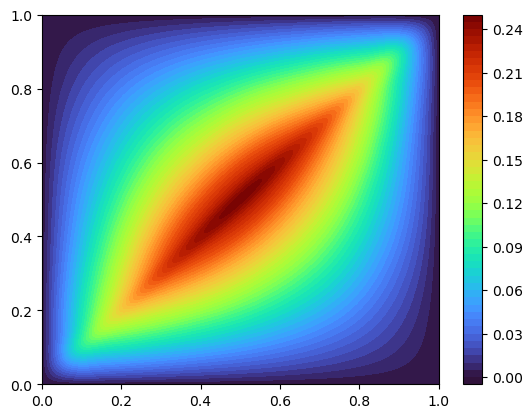

In [4]:
g.plot()

0.012318016


(0.0, 1.0)

<Figure size 800x600 with 0 Axes>

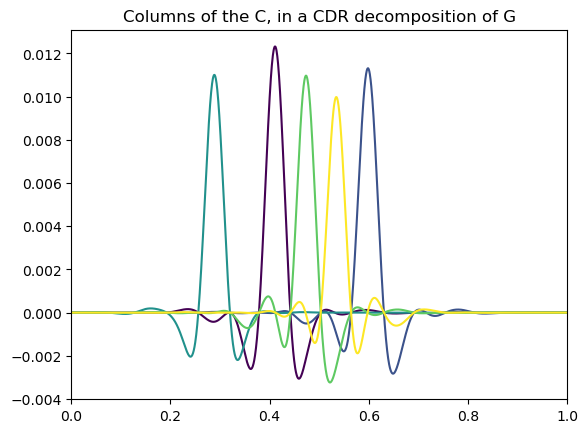

In [5]:
i = slice(15,20)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [6]:
%%time
u,s,v = g.svd()

CPU times: user 3.31 s, sys: 5.42 s, total: 8.73 s
Wall time: 1.18 s


1.576389778576278


(0.0, 1.0)

<Figure size 800x600 with 0 Axes>

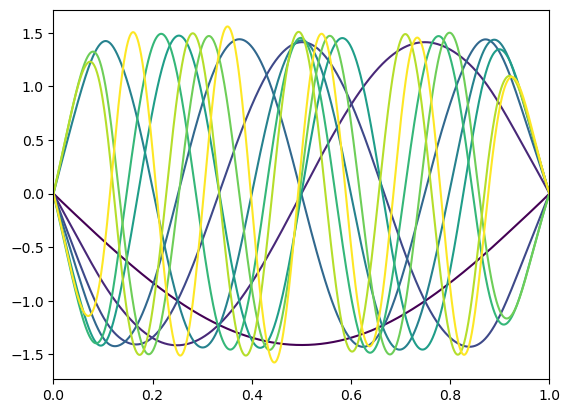

In [7]:
# i = slice(10,20)
i = slice(0,10)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot()
print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

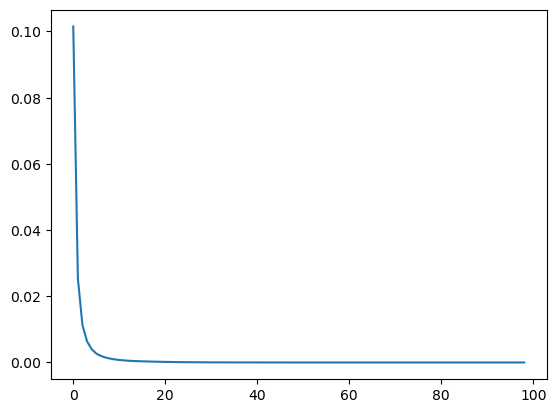

In [8]:
plt.figure()
plt.plot(s)

In [9]:
xx = np.linspace(domain[0],domain[1],2000)
yy = np.linspace(domain[2],domain[3],2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 2.87 s, sys: 325 ms, total: 3.19 s
Wall time: 2.92 s


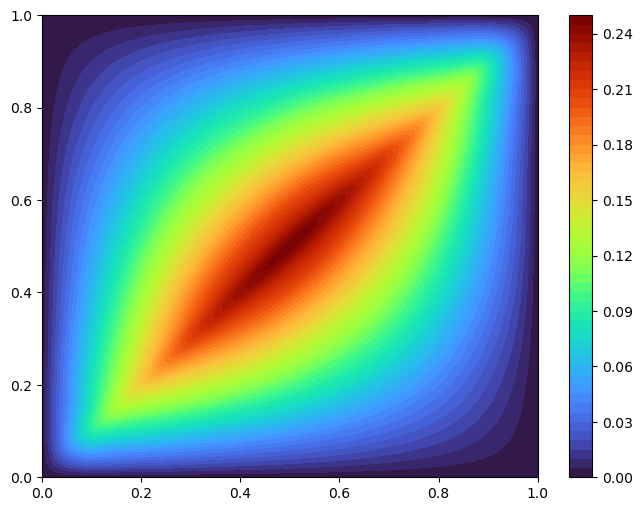

In [10]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 3.1 s, sys: 3.15 s, total: 6.25 s
Wall time: 2.12 s


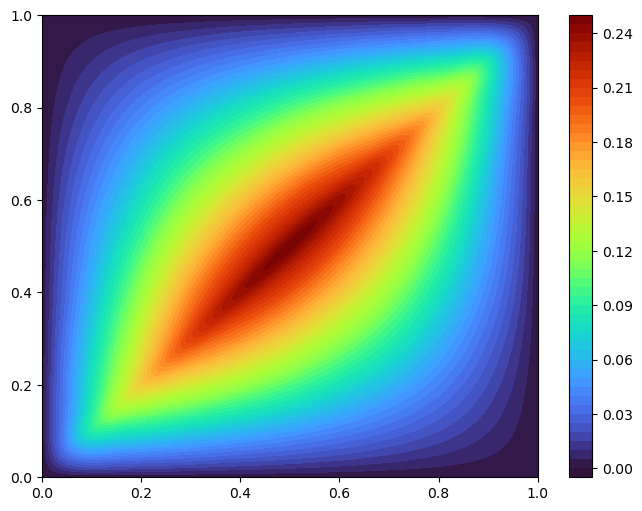

In [11]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)